In [62]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [63]:
df=pd.read_csv("IMDB_Dataset.csv")

In [64]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [66]:
def temizle(temiz_veri):
    temiz_veri = temiz_veri.lower()  # lowercase
    temiz_veri = re.sub(r'<.*?>', '', temiz_veri)  # remove HTML tags
    temiz_veri = re.sub(r'\d+', '', temiz_veri)  # remove numbers
    temiz_veri = re.sub(r'\s+', ' ', temiz_veri).strip()  # remove extra whitespace
    temiz_veri=re.sub(r'http\S+','',temiz_veri)
    temiz_veri=re.sub(r'[^\w\s]','',temiz_veri)
    return temiz_veri

In [67]:
df["temiz_veri"]=df["review"].apply(temizle)

In [68]:
df["temiz_veri"]

0        one of the other reviewers has mentioned that ...
1        a wonderful little production the filming tech...
2        i thought this was a wonderful way to spend ti...
3        basically theres a family where a little boy j...
4        petter matteis love in the time of money is a ...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am a catholic taught in parochial elementary...
49998    im going to have to disagree with the previous...
49999    no one expects the star trek movies to be high...
Name: temiz_veri, Length: 50000, dtype: object

In [69]:
print(df['sentiment'].unique())   

['positive' 'negative']


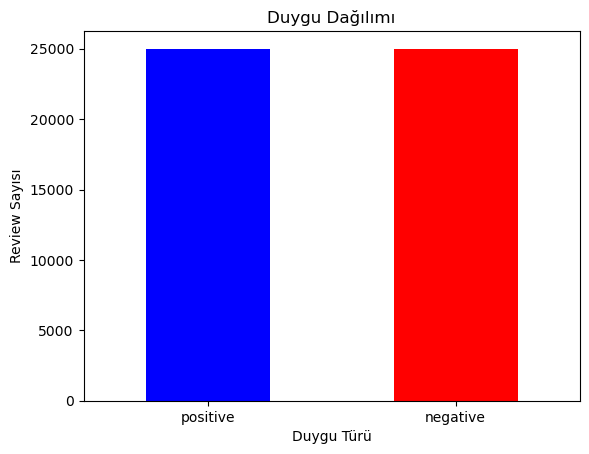

In [71]:
df['sentiment'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title("Duygu Dağılımı")
plt.xlabel("Duygu Türü")
plt.ylabel("Review Sayısı")
plt.xticks(rotation=0)
plt.show()

In [72]:
X_train, X_test, y_train, y_test = train_test_split(df['temiz_veri'], df['sentiment'], test_size=0.4, random_state=42)

In [73]:
tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))  
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [74]:
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)

LogisticRegression()

In [75]:
#tahmin
y_pred_lr = lr.predict(X_test_tfidf)
#dogruluk orani
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Model Doğruluğu: %{accuracy}")
print("Sınıflandırma Raporu:\n")
print(classification_report(y_test, y_pred_lr))

Model Doğruluğu: %0.8813
Sınıflandırma Raporu:

              precision    recall  f1-score   support

    negative       0.90      0.86      0.88      9989
    positive       0.87      0.90      0.88     10011

    accuracy                           0.88     20000
   macro avg       0.88      0.88      0.88     20000
weighted avg       0.88      0.88      0.88     20000



In [ ]:
# 5. Kullanıcıdan yorum al ve tahmin yap
yorum_tahmin = input("Kontrol etmek istediğin yorum: ")
X_yeni = tfidf.transform([yorum_tahmin])
tahmin = lr.predict(X_yeni)
print(f"Tahmin: '{yorum_tahmin}' bu yorumun duygusu büyük ihtimalle: {tahmin[0]}")
if tahmin[0]=="negative":
    print("Bence bu film izlenmeye değmez 🥱")
else:
    print("İzlemeye değer gibi duruyor 🤩")